# Introduction to NLP Fundamentals in Tensorflow

---
### Typical architecture:

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Hyperparameter/Layer type</th>
    <th style="text-align: center;">What does it do?</th> 
    <th style="text-align: center;">Typical values</th>
  </tr>
  <tr>
    <td style="text-align: left;">Input text(s)</td>
    <td style="text-align: left;">Target texts/sequences you'd like to discover patterns in</td> 
    <td style="text-align: left;">Whatever you can represent as text or sequence</td>
  </tr>
  <tr>
    <td style="text-align: left;">Input layer</td>
    <td style="text-align: left;">Takes in target sequence</td> 
    <td style="text-align: left; font-family: 'Courier New', Courier, monospace; font-size: 14px;">input_shape = [batch_size, embedding_size] or [batch_size, sequence_shape]</td>
  </tr>
  <tr>
    <td style="text-align: left;">Text vectorization layer</td>
    <td style="text-align: left;">Maps input sequences to numbers</td> 
    <td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.TextVectorization</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Embedding</td>
    <td style="text-align: left;">Turns mapping of text vectors to embedding matrix</td> 
<td style="text-align: left;">Multiple, can create with <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Embedding</span></td> 
  </tr>
  <tr>
    <td style="text-align: left;">RNN cells(s)</td>
    <td style="text-align: left;">Find patterns in sequences</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">SimpleRNN, LSTM, GRU</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Hidden activation</td>
    <td style="text-align: left;">Adds non-linearity to learned features</td>
    <td style="text-align: left; font-size: 14px;">Usually Tanh hyperbolic tangent) (<span style="color: blue; text-decoration: underline;">tf.keras.activations.tanh</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Pooling layer</td>
    <td style="text-align: left;">Reduces the dimensionality of learned sequences features (usually for Conv1D models)</td>
    <td style="text-align: left;">Average (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalAveragePooling1D</span>) or Max (<span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.GlobalMaxPool1D</span>)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Fully connected layer</td>
    <td style="text-align: left;">Further refines learned features from recurrent layers</td>
    <td style="text-align: left;"><span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.layers.Dense</span></td>
  </tr>
  <tr>
    <td style="text-align: left;">Output layer</td>
    <td style="text-align: left;">Takes learned features and outputs them in shape of taget labels</td>
    <td style="text-align: left;font-size: 14px;"><span style="font-family: 'Courier New', Courier, monospace; font-size: 14px;">output_shape = [number_of_classes]</span> (e.g. 2 for Diaster or Not Diaster)</td>
  </tr>
  <tr>
    <td style="text-align: left;">Output activation</td>
    <td style="text-align: left;">Adds non-linearities to output layer</td>
    <td style="text-align: left;font-size: 14px;"><span style="color: blue; text-decoration: underline;">tf.keras.activations.sigmoid</span> (binary classification) or <span style="font-size: 14px; color: blue; text-decoration: underline;">tf.keras.activations.softmax</span></td>
  </tr>
</table>

### Get helper functions

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-29 21:18:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.108.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 10246 (10K) [text/plain]
Grabando a: «helper_functions.py»

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    en 0s      

2024-03-29 21:18:12 (31.2 MB/s) - «helper_functions.py» guardado [10246/10246]



In [77]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys, make_confusion_matrix

----
## Get dataset

I'm gonna use the *'Keaggle's introduction to NLP'* dataset (tweets labelled as diaster or not diaster).

In [3]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-03-29 21:23:27--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 142.250.79.91, 142.251.134.27, 142.250.79.155, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[142.250.79.91]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 607343 (593K) [application/zip]
Grabando a: «nlp_getting_started.zip»

nlp_getting_started 100%[===================>] 593.11K   762KB/s    en 0.8s    

2024-03-29 21:23:28 (762 KB/s) - «nlp_getting_started.zip» guardado [607343/607343]



---
## Visualizing a text dataset 📊

In [4]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42) # shuffle with random_state=42 for reproducibility
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [9]:
# Let's visualize some random training examples
import random
def see_examples(count=3):
    random_index = random.randint(0, len(train_df)-count) # create random indexes not higher than the total number of samples
    for row in train_df_shuffled[["text", "target"]][random_index:random_index+count].itertuples():
      _, text, target = row
      print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
      print(f"Text:\n{text}\n")
      print("---\n")

In [10]:
see_examples(5)

Target: 0 (not real disaster)
Text:
@morehouse64 It appears our #Govt has lost an #Ethical and or moral relevance. This means the whole #USA population is in danger from them.

---

Target: 1 (real disaster)
Text:
Not only does he know the latest research the kiddo's GI specialist sang the volcano number from Inside Out. Now THAT is whole person care.

---

Target: 0 (not real disaster)
Text:
IS ROSS DEAD NOOOOOOOOOOOO @MikeParrActor

---

Target: 0 (not real disaster)
Text:
@RohnertParkDPS You're another one for the history books! (Thank the Justice Department!) And by the way I haven't paid income tax in 20yrs.

---

Target: 1 (real disaster)
Text:
Virgin galactic crash: early unlocking of brakes triggered structural failure: The crash of a Virgin Galactic ... http://t.co/x3VqxdouVT

---



---
## Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1) # dedicate 10% of samples to validation set

---
## Converting text into numbers 💬➡🔢

In NLP, there are two main concepts for turning text into numbers

* **Tokenization** - A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization:
    1. ***Using word-level tokenization*** - Every word in a sequence considered a single token.
    2. ***Character-level tokenization*** - Every character in a sequence considered a single token.
    3. ***Sub-word tokenization*** - Every word could be considered multiple tokens (is in between word-level and character-level tokenization).
* **Embeddings** - An embedding is a representation of natural language which can be learned.The size of the feature vector is tuneable. There are two ways to use embeddings:
    1. ***Create your own embedding*** - Once your text has been turned into numbers (required for an embedding), you can put them through an embedding layer (such as tf.keras.layers.Embedding) and an embedding representation will be learned during model training.
    2. ***Reuse a pre-learned embedding*** - Many pre-trained embeddings exist online, like [Word2vec embeddings](http://jalammar.github.io/illustrated-word2vec/) or [GloVe embeddings](https://nlp.stanford.edu/projects/glove/).

### Text vectorization (tokenization) 

Helpful preprocessing layer:
[tf.keras.layers.TextVetorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
#text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
#                                    standardize="lower_and_strip_punctuation", # how to process text
#                                    split="whitespace", # how to split tokens
#                                    ngrams=None, # create groups of n-words?
#                                    output_mode="int", # how to map tokens to numbers
#                                    output_sequence_length=None) # how long should the output sequence of tokens be?
#                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [23]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

I will create a ```TextVectorization``` object using custom data

In [24]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [25]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

2024-03-30 11:04:23.152796: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-30 11:04:23.270056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
# Create sample sentence and tokenize it
sample_sentence = "There was a murder in my neighborhood!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  75,   23,    3,  326,    4,   13, 3613,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [36]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['paging', 'pages', 'pageparkescorp', 'pagasa', 'paeds']


### Embedding using an Embedding Layer

[tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

In [37]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

In [38]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full reÛ_ http://t.co/fDSaoOiskJ http://t.co/2uVmq4vAfQ      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00699872, -0.04713403,  0.0155743 , ...,  0.04213461,
          0.03943077, -0.0011541 ],
        [ 0.04781768, -0.01657576,  0.01252652, ...,  0.00944549,
         -0.02994425, -0.00973493],
        [-0.02485663, -0.0480586 , -0.01458284, ..., -0.03451221,
         -0.0494932 , -0.04637484],
        ...,
        [-0.04144374,  0.04613325,  0.02777721, ...,  0.00058659,
          0.04806883,  0.03803296],
        [-0.02522571, -0.00520702,  0.01144322, ..., -0.04425932,
         -0.01395472, -0.00609375],
        [-0.02086855,  0.04058148,  0.04483402, ..., -0.03827721,
         -0.04586843,  0.02502631]]], dtype=float32)>

---
## I will build the following models

<table style="font-size: 17px;">
  <tr>
    <th style="text-align: center;">Experiment number</th>
    <th style="text-align: center;">Model</th> 
  </tr>
  <tr>
    <td style="text-align: center;">0</td>
    <td style="text-align: center;">Naive bayes with TF-IDF encoder (baseline)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">1</td>
    <td style="text-align: center;">Feed-forward neural network (dense model)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">2</td>
    <td style="text-align: center;">LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">3</td>
    <td style="text-align: center;">GRU (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">4</td>
    <td style="text-align: center;">Bidirectional-LSTM (RNN)</td> 
  </tr>
  <tr>
    <td style="text-align: center;">5</td>
    <td style="text-align: center;">1D Convolutional Neural Network</td>
  </tr>
  <tr>
    <td style="text-align: center;">6</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor</td>
  </tr>
  <tr>
    <td style="text-align: center;">7</td>
    <td style="text-align: center;">Tensorflow Hub pretrained Feature Extractor (10% of data)</td>
  </tr>
</table>

### Model 0 (baseline)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("classifier", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

In [42]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 77.82%


In [68]:
sample_sentence = "Forest fire in Buenos Aires. Argentina"

custom_pred = model_0.predict([sample_sentence])
print(f"{sample_sentence}", "(real disaster)" if custom_pred > 0 else "(not real disaster)")

Forest fire in Buenos Aires. Argentina (real disaster)


Creating an **evaluation function** for the experiments using these methods:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix (optional)

In [86]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

def calculate_results(y_true, y_pred, cf_matrix=False):
    """
    Calculates model accuracy, precision, recall and f1 score and confusion matrix (optional) of a binary classification model.

    Args:
    -----
    y_true = true labels in the form of a 1D array
    y_pred = predicted labels in the form of a 1D array
    cf_matrix = False per default

    Returns a dictionary of accuracy, precision, recall, f1-score and print a cf matrix.
    """
    # Calculate model accuracy
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
    model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
    if(cf_matrix):
        make_confusion_matrix(y_true, y_pred, figsize=(4,4))
    return model_results

{'accuracy': 77.82152230971128,
 'precision': 0.791021392978114,
 'recall': 0.7782152230971129,
 'f1': 0.7698584402000296}

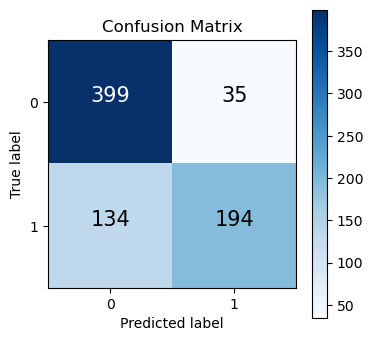

In [85]:
# Get baseline results
calculate_results(y_true=val_labels,
                  y_pred=model_0.predict(val_sentences),
                  cf_matrix=True)

### Model 1 (simple dense model)

In [87]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [97]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [98]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [111]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240330-221019
Epoch 1/5


2024-03-30 22:10:19.557919: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14887a4e0
2024-03-30 22:10:19.557970: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14887a4e0
2024-03-30 22:10:19.596049: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x14887a4e0


NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_1' defined at (most recent call last):
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/vl/yrm7q8s10zl67bw31yr66mph0000gn/T/ipykernel_54012/3451416198.py", line 2, in <module>
      model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/lucas/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_1'
could not find registered platform with id: 0x14887a4e0
	 [[{{node StatefulPartitionedCall_1}}]] [Op:__inference_train_function_3687]

In [113]:
!pip show tensorflow-macos

Name: tensorflow-macos
Version: 2.9.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/lucas/anaconda3/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, termcolor, typing-extensions, wrapt
Required-by: 
